<a href="https://colab.research.google.com/github/EunjaeHan/data/blob/main/20231113_%ED%95%9C%EC%9D%80%EC%9E%AC_%EC%88%98%EC%97%85%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu',
                    padding='same', strides=1)

합성곱은 밀집층과 비슷하게 입력과 가중치를 곱하고 절편을 더하는 선형 계산이다. 하지만 밀집층과 달리 각 합성곱은 입력 전체가 아니라 일부만 사용하여 선형 계산을 수행한다.

합성곱 층의 필터는 밀집층의 뉴런에 해당한다. 필터의 가중치와 절편을 종종 커널이라고 부른다. 자주 사용하는 커널의 크기는 (3, 3) 또는 (5, 5)이다. 커널의 깊이는 입력의 깊이와 같다.

특성 맵은 합성곱 층이나 풀링 층의 출력 배열을 의미한다. 필터 하나가 하나의 특성 맵을 만든다. 합성곱 층에서 5개의 필터를 적용하면 5개의 특성 맵이 만들어진다.

패딩은 합성곱 층의 입력 주위에 추가한 0으로 채워진 픽셀이다. 패딩을 사용하지 않는 것을 밸리드 패딩이라고 한다. 합성곱 층의 출력 크기를 입력과 동일하게 만들기 위해 입력에 패딩을 추가하는 것을 세임 패딩이라고 한다.

스트라이드는 합성곱 층에서 필터가 입력 위를 이동하는 크기다. 일반적으로 스트라이드는 1픽셀을 사용한다.

풀링은 가중치가 없고 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다. 대표적으로 최대 풀링과 평균 풀링이 있으며 (2, 2) 풀링으로 입력을 절반으로 줄인다.

#합성곱 신경망을 사용한 이미지 분류

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

##패션 MNIST 데이터 불러오기

Fashion MNIST 데이터셋은 위 그림과 같이 운동화, 셔츠, 샌들과 같은 작은 이미지들의 모음이며, 기본 MNIST 데이터셋과 같이 열 가지로 분류될 수 있는 28×28 픽셀의 이미지 70,000개로 이루어져 있다.

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


##합성곱 신경망 만들기

In [3]:
model = keras.Sequential()

In [4]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [5]:
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

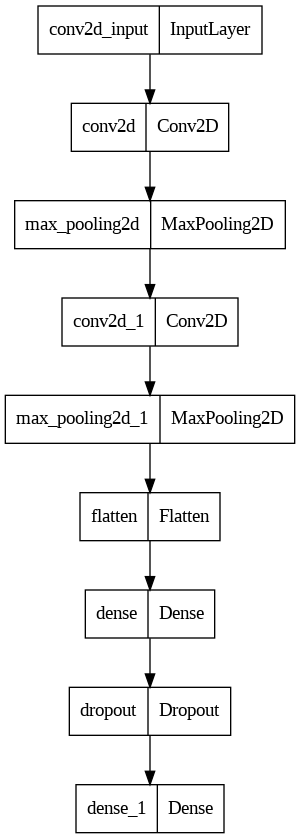

In [9]:
keras.utils.plot_model(model)

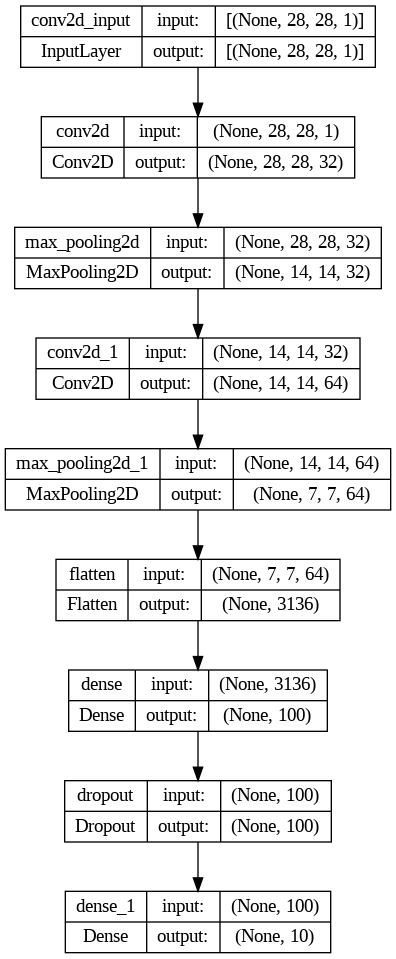

In [10]:
keras.utils.plot_model(model, show_shapes=True)

##모델 컴파일과 훈련

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 97s 62ms/step - loss: 0.5087 - accuracy: 0.8173 - val_loss: 0.3162 - val_accuracy: 0.8830
Epoch 2/20
   3/1500 [..............................] - ETA: 1:01 - loss: 0.3933 - accuracy: 0.8854

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 77s 51ms/step - loss: 0.3377 - accuracy: 0.8781 - val_loss: 0.2730 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.2906 - accuracy: 0.8958 - val_loss: 0.2436 - val_accuracy: 0.9097
Epoch 4/20
1500/1500 [==============================] - 68s 45ms/step - loss: 0.2574 - accuracy: 0.9063 - val_loss: 0.2341 - val_accuracy: 0.9137
Epoch 5/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2346 - accuracy: 0.9136 - val_loss: 0.2307 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 65s 44ms/step - loss: 0.2130 - accuracy: 0.9222 - val_loss: 0.2154 - val_accuracy: 0.9209
Epoch 7/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.1978 - accuracy: 0.9272 - val_loss: 0.2241 - val_accuracy: 0.9199
Epoch 8/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.1782 - accuracy: 0.9333 - val_loss: 0.2235 - val_accura

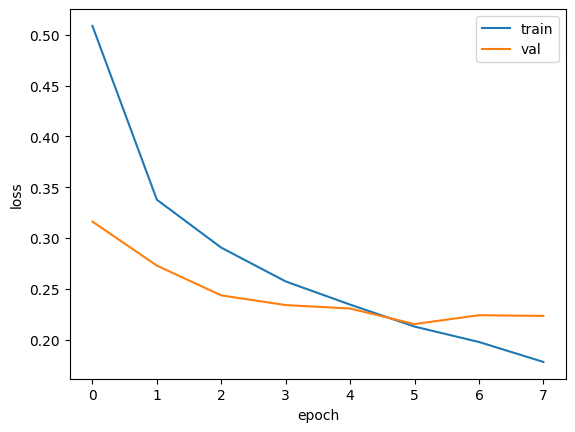

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 6s 15ms/step - loss: 0.2154 - accuracy: 0.9209


[0.21544331312179565, 0.9209166765213013]

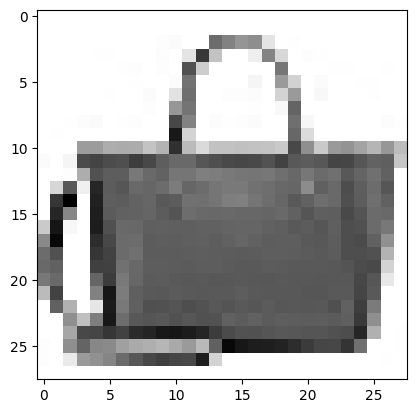

In [14]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [15]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 115ms/step
[[1.06689004e-13 3.67346649e-23 1.60802852e-17 2.02338608e-16
  2.59285277e-15 7.20286054e-14 1.50633544e-14 2.97381646e-14
  1.00000000e+00 1.13369380e-14]]


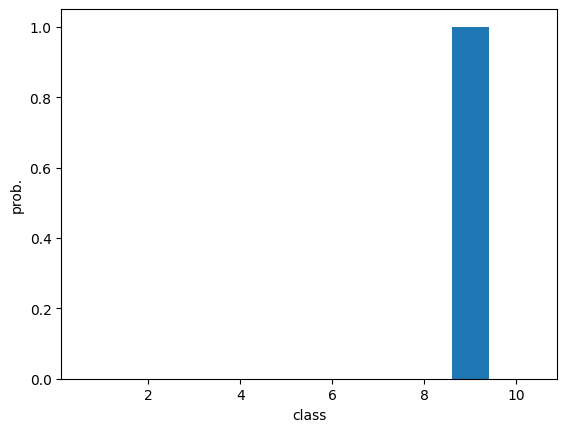

In [17]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [16]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

import numpy as np
print(classes[np.argmax(preds)])

가방


In [18]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [19]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 6s 18ms/step - loss: 0.2381 - accuracy: 0.9138


[0.2380589097738266, 0.9138000011444092]

#합성곱 신경망의 시각화

In [20]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

##가중치 시각화

가중치 시각화는 합성곱 층의 가중치를 이미지로 출력하는 것을 말한다. 합성곱 신경망은 주로 이미지를 다루기 때문에 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있다.

In [21]:
from tensorflow import keras

In [22]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2023-11-26 10:51:01--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2023-11-26 10:51:02--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4046712 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.1’

best-cnn-model.h5.1 100%[===================>]   3.86M  14.8MB/s    in 0.3s    

2023-11-26 10:51:03 (14.8 MB/s) - ‘best-cnn-model.h5.1’ saved [4046712/4046712]



In [23]:
model = keras.models.load_model('best-cnn-model.h5')

In [24]:
model.layers

In [25]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [26]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.015002885 0.23111317


In [27]:
import matplotlib.pyplot as plt

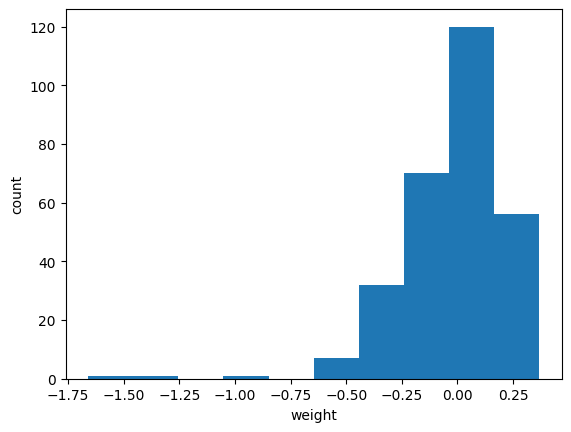

In [28]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

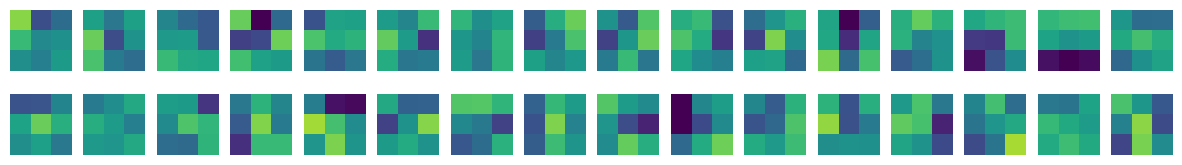

In [29]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [30]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [31]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.010310263 0.0773888


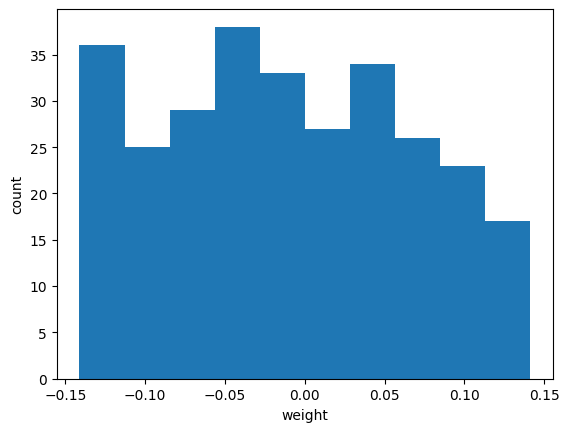

In [32]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

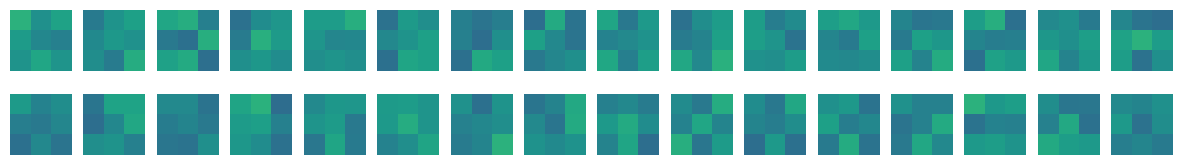

In [33]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

##함수형 API

함수형 API는 케라스에서 신경망 모델을 만드는 방법 중 하나다. Model 클래스에 모델의 입력과 출력을 지정한다. 전형적으로 입력은 Input() 함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의한다.

In [34]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [35]:
conv_acti = keras.Model(model.input, model.layers[0].output)

##특성 맵 시각화

특성 맵 시각화는 합성곱 층의 활성화 출력을 이미지로 그리는 것을 말한다. 가중치 시각화와 함께 비교하여 각 필터가 이미지의 어느 부분을 활성화시키는지 확인할 수 있다.

In [36]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

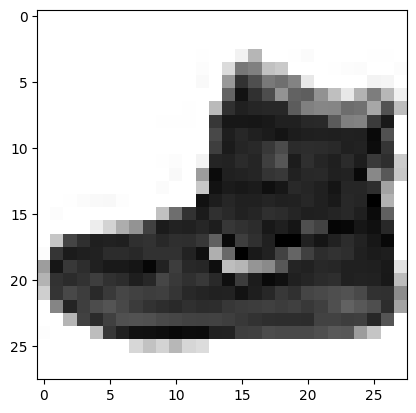

In [37]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [38]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 103ms/step


In [39]:
print(feature_maps.shape)

(1, 28, 28, 32)


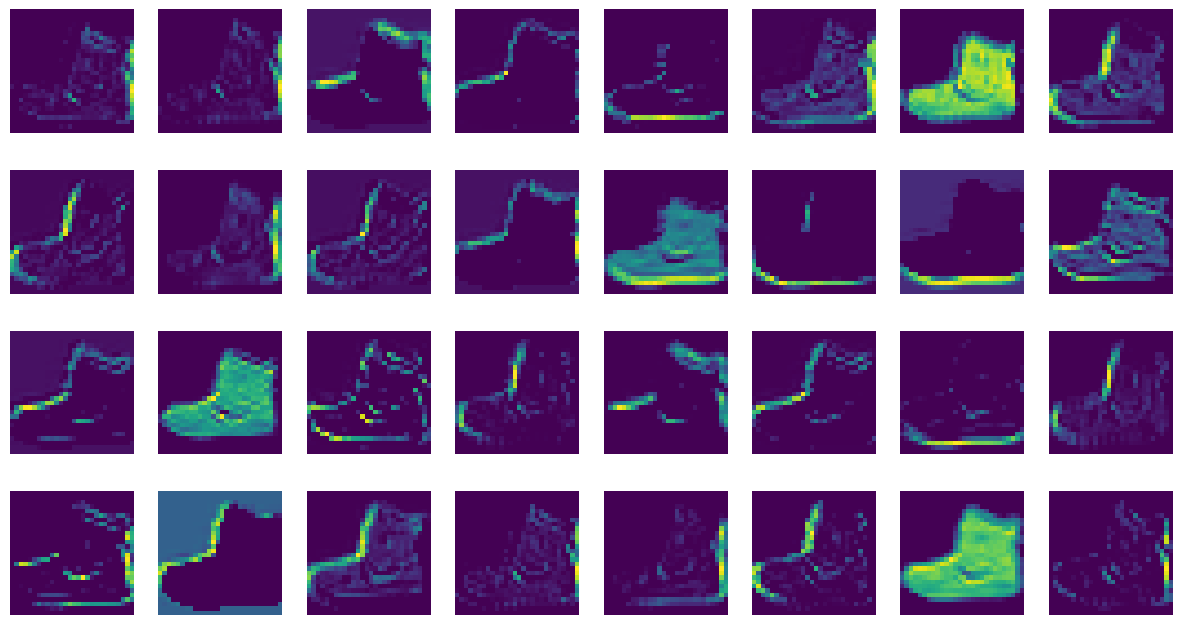

In [40]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [41]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [42]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 130ms/step


In [43]:
print(feature_maps.shape)

(1, 14, 14, 64)


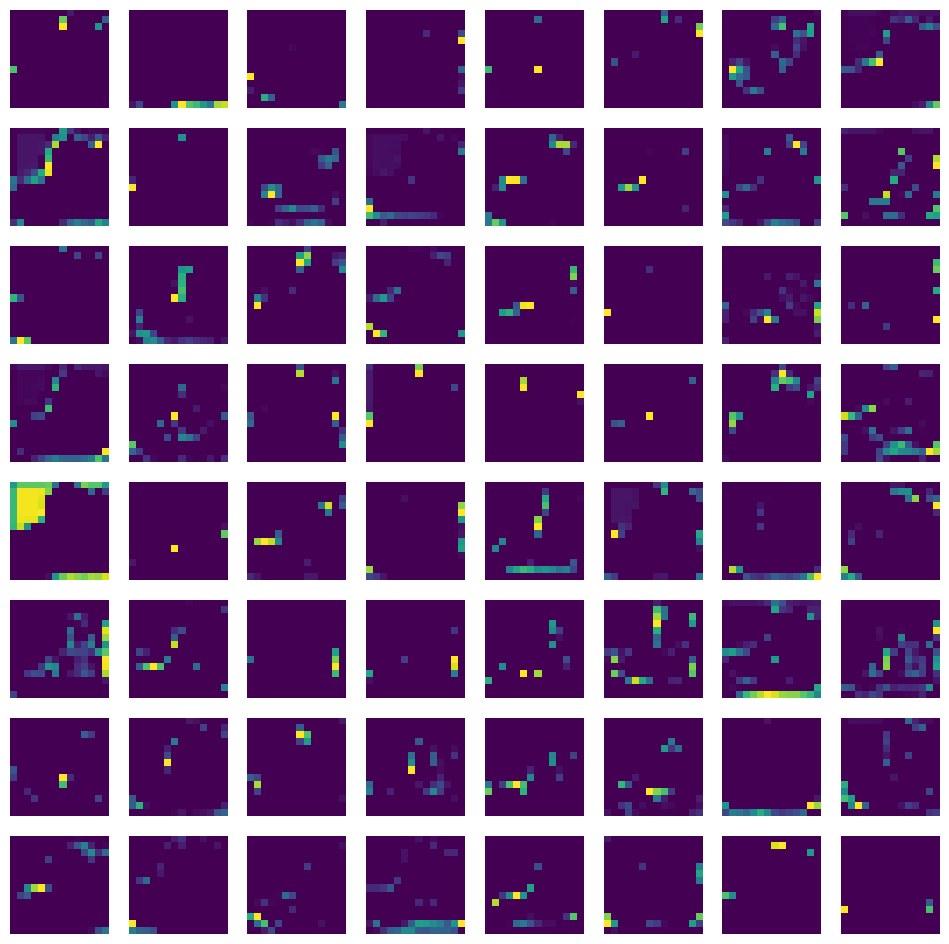

In [44]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()